In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X.shape

(569, 30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train[:, :2], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

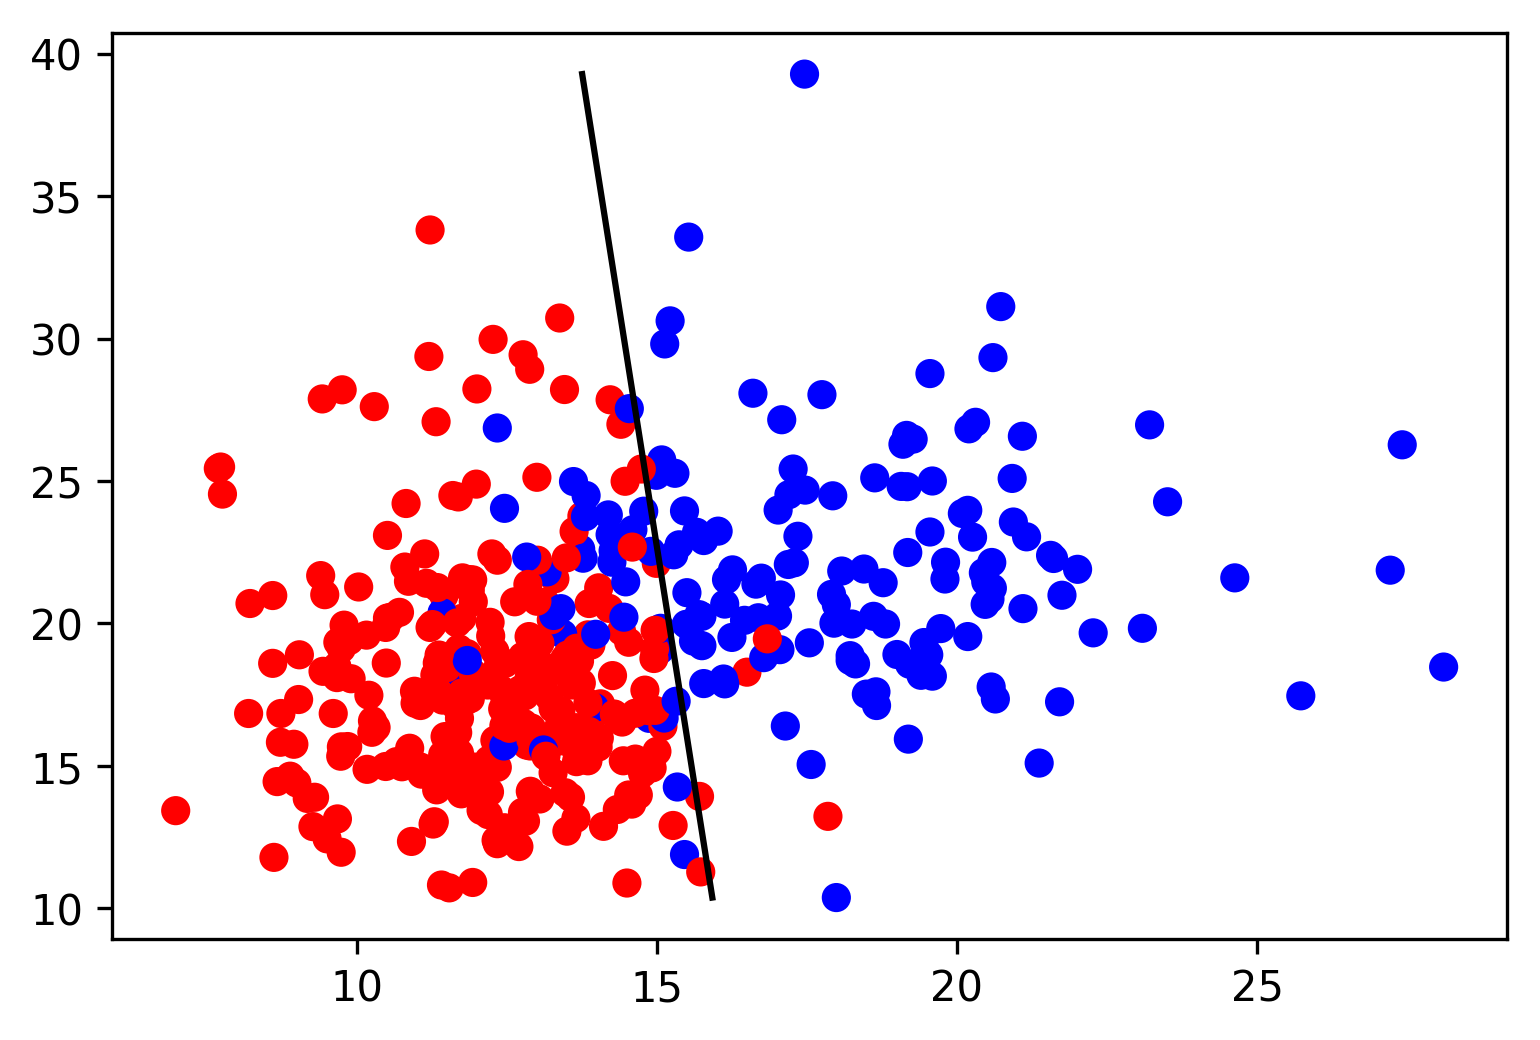

In [29]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr")
coef = logreg.coef_.ravel()
line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
line2 = - (line * coef[1]  + logreg.intercept_) / coef[0]
plt.plot(line2, line, c='k')

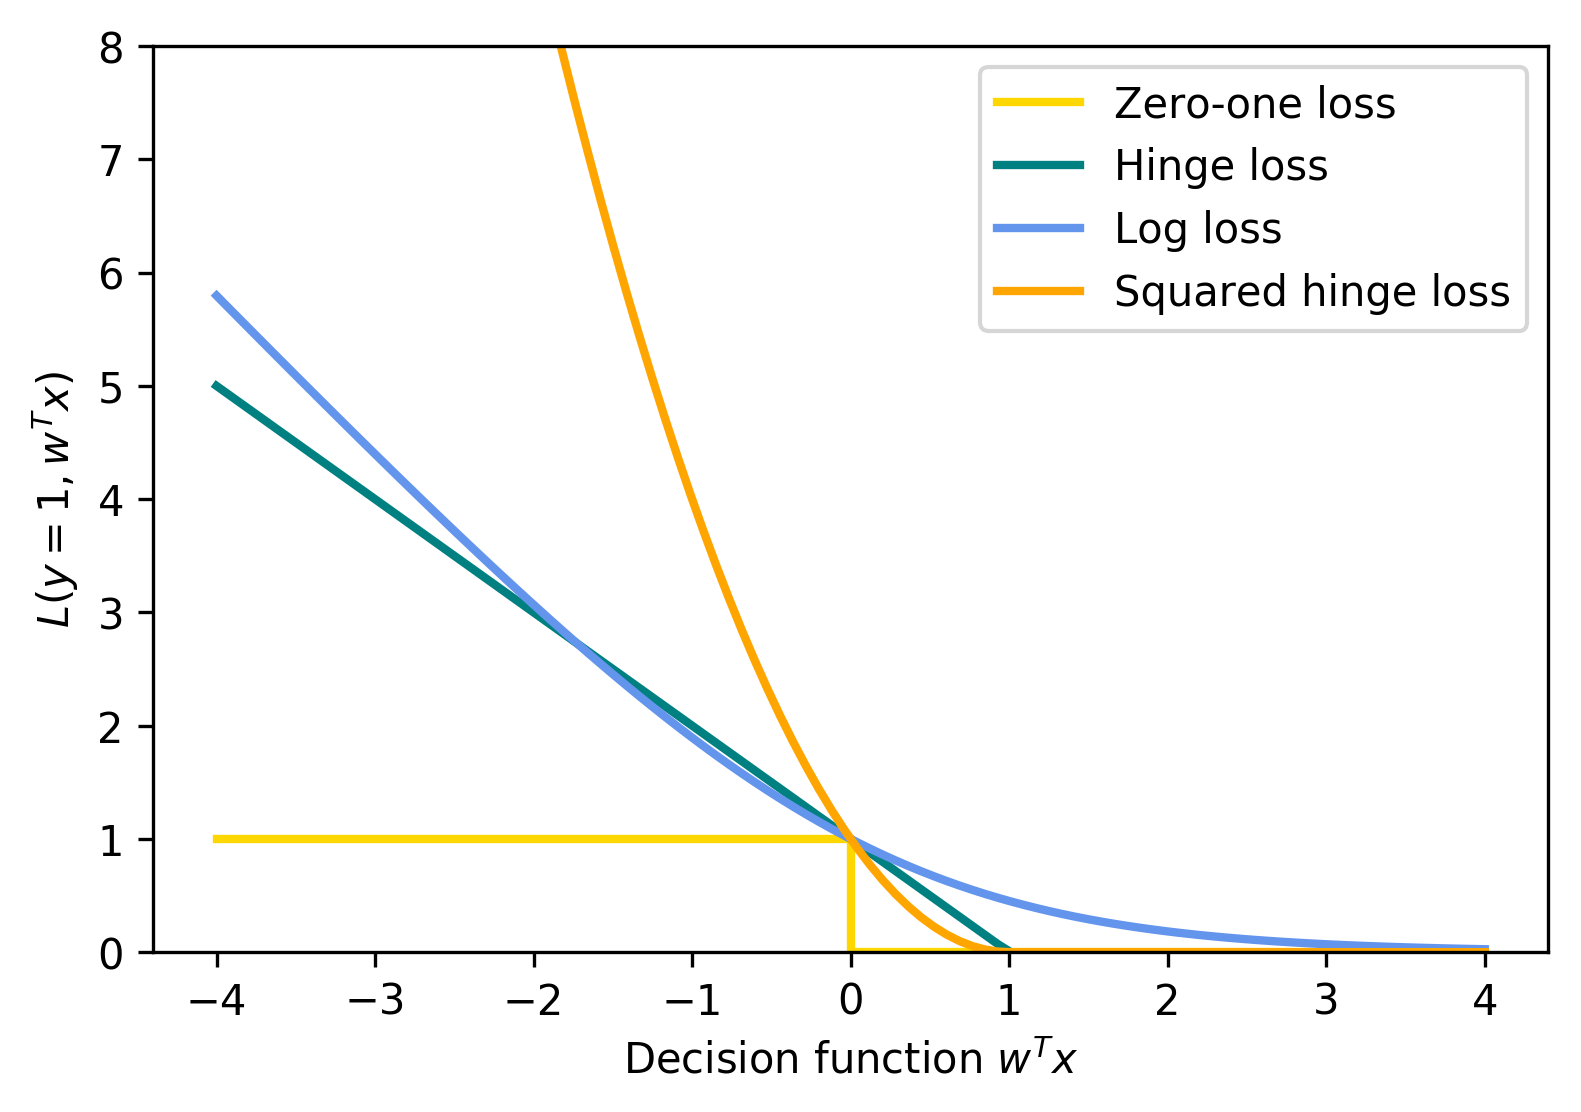

In [53]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")

plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $w^Tx$")
plt.ylabel("$L(y=1, w^Tx) $")

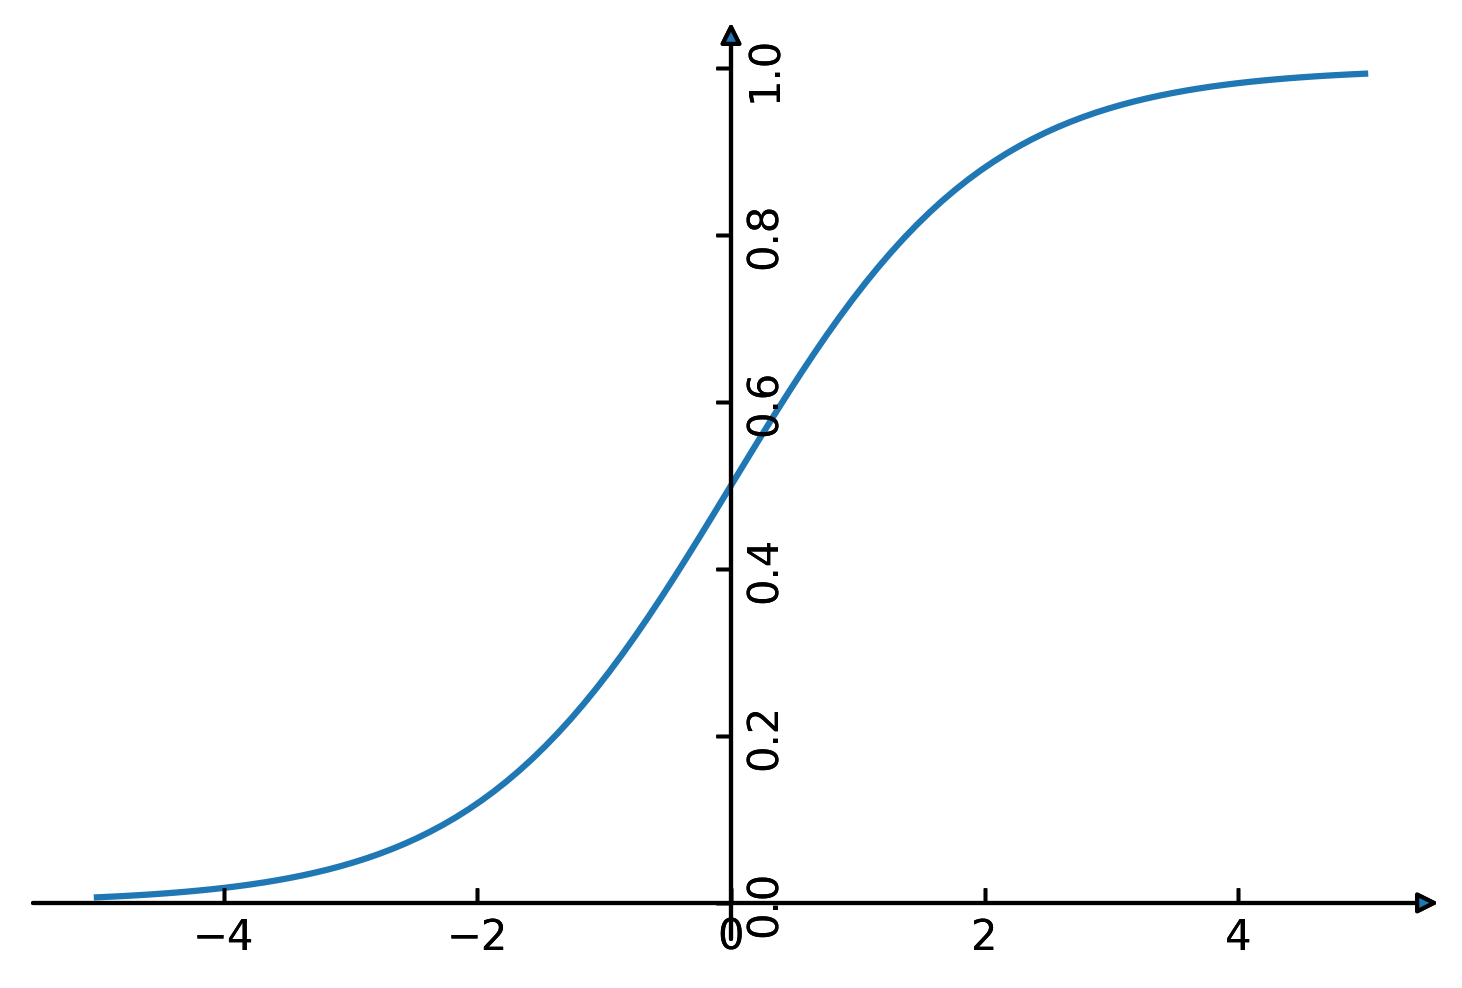

In [47]:
from mpl_toolkits.axes_grid.axislines import SubplotZero
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

line =  np.linspace(-5, 5, 100)   
ax.plot(line, 1. / (1 + np.exp(-line)))

# Multiclass

In [143]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
print(X.shape)
print(np.bincount(y))

(100, 2)
[34 33 33]


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression().fit(X, y)
linearsvm = LinearSVC().fit(X, y)
print(logreg.coef_.shape)
print(linearsvm.coef_.shape)

(3, 2)
(3, 2)


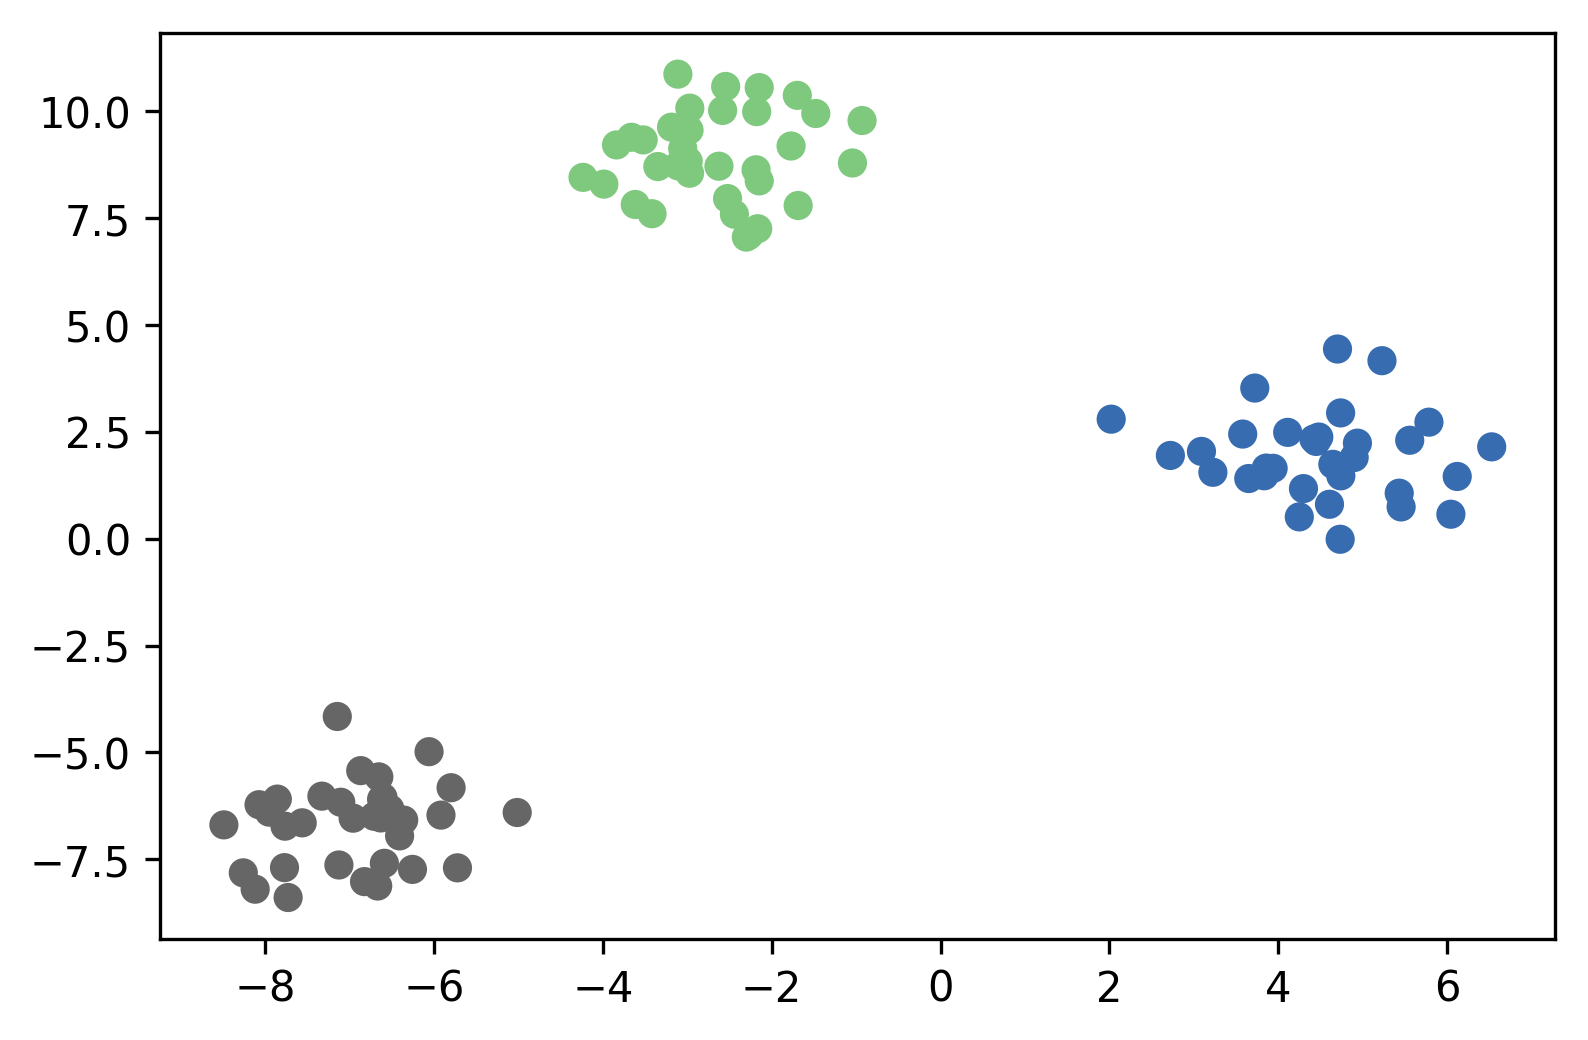

In [59]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

In [63]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

In [120]:
plt.cm.Accent(2)

(0.99215686274509807, 0.75294117647058822, 0.52549019607843139, 1.0)

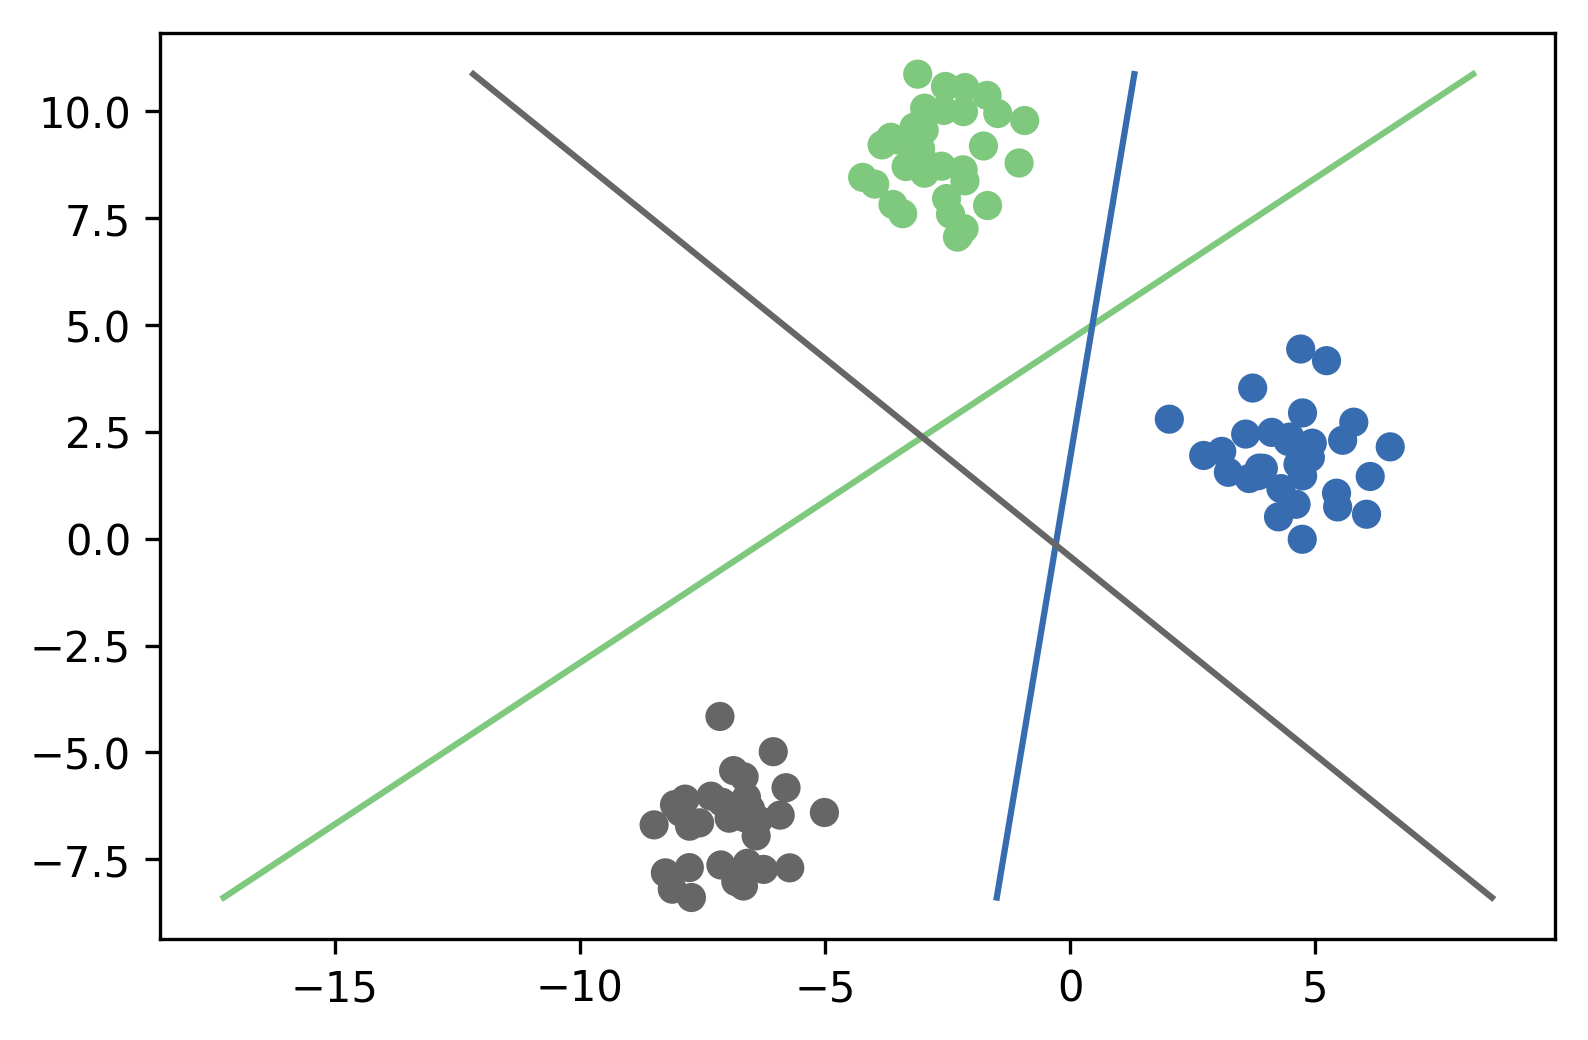

In [141]:
points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
colors = [plt.cm.Accent(i) for i in [0, 4, 7]]
line = np.linspace(X[:, 1].min(), X[:, 1].max())
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
    
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

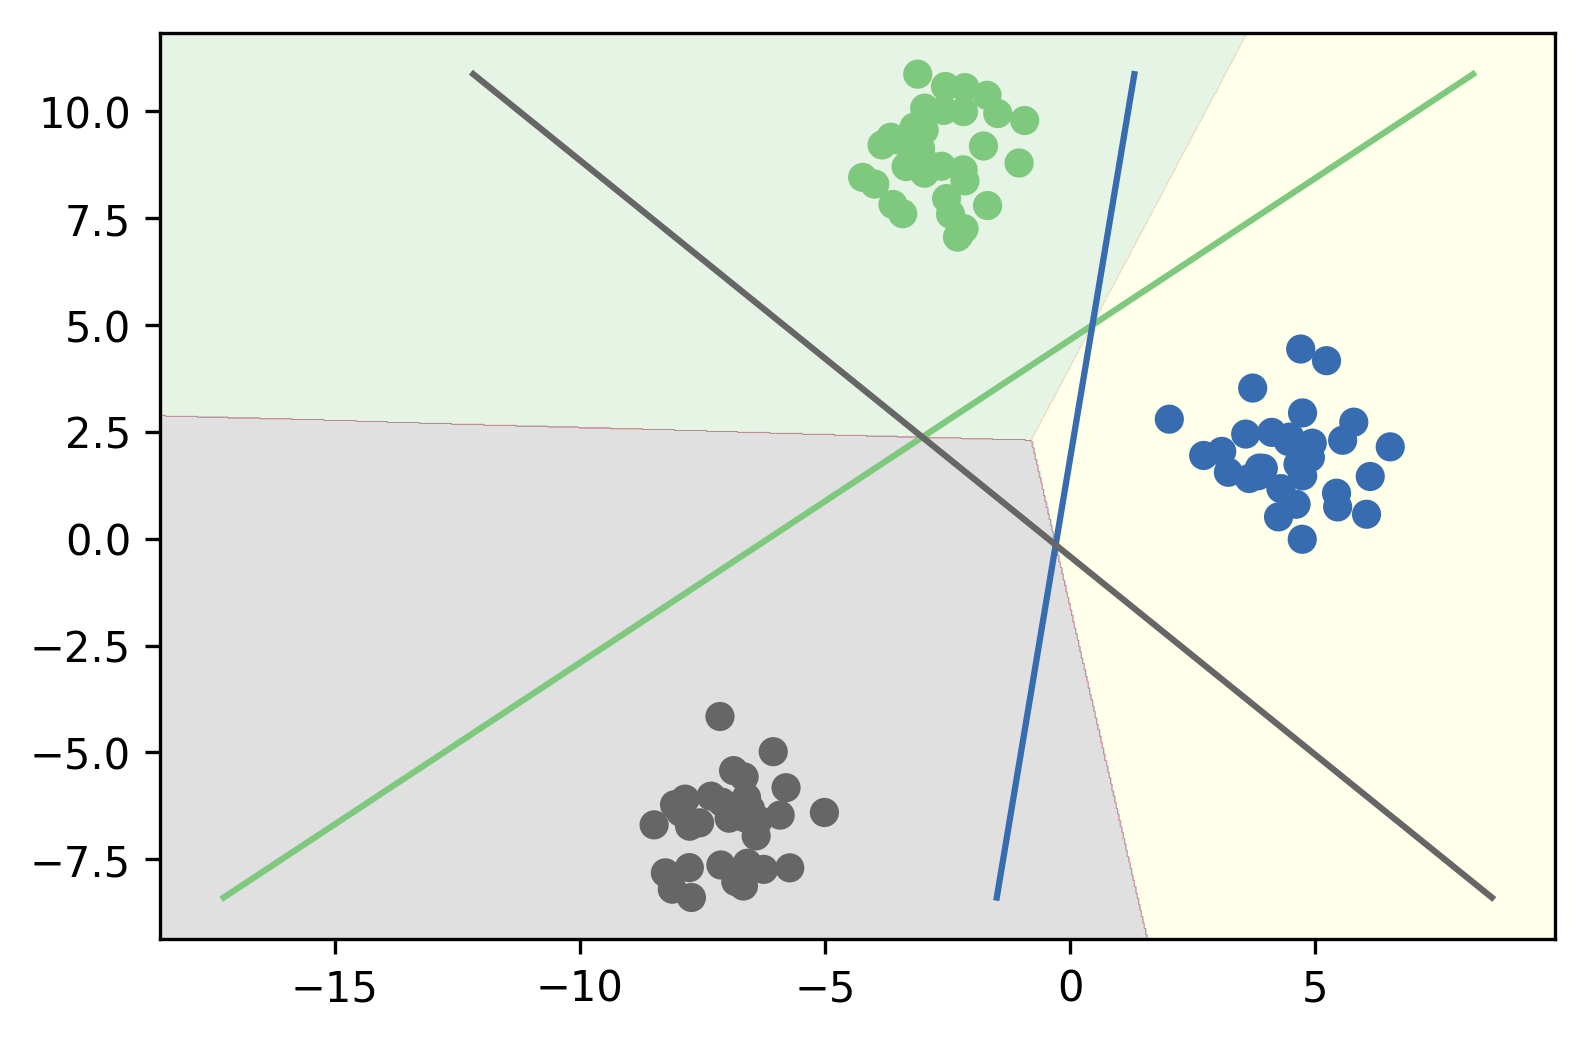

In [142]:

xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
pred = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, pred.reshape(xx.shape), cmap="Accent", alpha=.2)

points = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, colors):
    plt.plot(-(line * coef[1] + intercept) / coef[0], line, c=color)
